<a href="https://colab.research.google.com/github/IAMPathak2702/nlp-getting-started/blob/main/Disaster_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP - Natural Language Processing
NLP is a field of artificial intelligence that focuses on the interaction between computers and humans through natural language. It encompasses a wide range of tasks and techniques that enable computers to understand, interpret, and generate human language. NLP has numerous applications, ***including machine translation, sentiment analysis, chatbots, information retrieval, text summarization, and more.***

One important aspect of NLP is ***text classification***, which involves categorizing text documents or sentences into predefined categories or classes. Text classification is a supervised learning task, meaning that it requires labeled training data where each text example is associated with a specific class. The goal is to train a machine learning model that can generalize from the training data to correctly classify new, unseen text instances.

Here are the general steps involved in text classification using NLP:

1. **Data Collection and Preprocessing:**
   - Gather a dataset containing text documents along with their corresponding labels (categories/classes).
   - Preprocess the text by removing irrelevant information (like punctuation, special characters, and numbers) and converting all text to lowercase.
   - Tokenize the text by splitting it into individual words or subword units (e.g., using techniques like word tokenization or subword tokenization).

2. **Feature Extraction:**
   - Convert the text data into a numerical format that machine learning algorithms can work with.
   - Common techniques for feature extraction include:
     - Bag-of-Words: Represent each document as a vector where each dimension corresponds to a unique word, and the value represents the word's frequency in the document.
     - TF-IDF (Term Frequency-Inverse Document Frequency): A numerical representation that takes into account the frequency of a word in a document as well as its importance in the entire corpus.
     - Word Embeddings: Dense vector representations that capture semantic relationships between words based on their usage in a large text corpus (e.g., Word2Vec, GloVe, etc.).

3. **Model Selection and Training:**
   - Choose a suitable machine learning algorithm for text classification, such as:
     - Naive Bayes
     - Support Vector Machines
     - Decision Trees
     - Random Forests
     - Neural Networks (e.g., Convolutional Neural Networks, Recurrent Neural Networks)
   - Split the dataset into training and validation sets.
   - Train the chosen model using the training data and tune its hyperparameters for optimal performance.

4. **Evaluation:**
   - Evaluate the trained model's performance on the validation set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score).
   - Adjust the model and hyperparameters as needed to improve performance.

5. **Prediction:**
   - Once the model is trained and evaluated, use it to predict the classes of new, unseen text data.

Text classification is a fundamental task in NLP with numerous real-world applications, ranging from spam detection and sentiment analysis to topic categorization and intent recognition in chatbots. The success of text classification largely depends on the quality of the training data, the choice of features, and the model architecture.

## NLP and RNN

***Recurrent Neural Networks*** : RNNs are a class of artificial neural networks designed to work with sequences of data. Unlike traditional feedforward neural networks that process fixed-size inputs, RNNs can handle sequences of varying lengths. They maintain an internal hidden state that captures information from previous steps in the sequence and uses it to influence the processing of the current step. This makes RNNs well-suited for tasks involving sequences, such as natural language processing.

In NLP, RNNs have been widely used due to their ability to capture contextual information and sequential dependencies in text data. Here's how RNNs are relevant in NLP:

1. Sequential Data Processing: Text data is inherently sequential, as words in a sentence are ordered and often have contextual relationships with nearby words. RNNs are capable of capturing these sequential dependencies, making them useful for tasks like language modeling, where predicting the next word in a sentence depends on the words that came before it.

2. Sentiment Analysis: RNNs can be used for sentiment analysis, a task that involves determining the sentiment or emotion expressed in a piece of text. By processing text sequentially, RNNs can capture the nuanced sentiment in longer text passages.

3. Language Generation: RNNs are also employed for text generation tasks, such as generating coherent sentences or paragraphs of text. By conditioning the generation process on previous words, RNNs can produce text that flows naturally and makes sense.

4. Machine Translation: RNNs have been used in machine translation models to translate text from one language to another. These models process input sentences sequentially, converting them into meaningful translations.

5. Named Entity Recognition: RNNs can be applied to named entity recognition tasks, where the goal is to identify and classify entities like names of people, places, organizations, etc., in a text.

6. Text Classification: RNNs, particularly Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) variants, can be used for text classification tasks, such as sentiment analysis and topic categorization.

In [ ]:
# Importing Relevant Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tensorflow import keras
from keras import layers,Sequential,applications

from helper_functions import *

## Dataset - Kaggle `NLP_getting_started`

In [ ]:
unzip_data('/content/nlp-getting-started.zip')

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df_shuffled = train_df.sample(frac=1, random_state=42,)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [ ]:
## checking the balance of the dataset

train_df_shuffled.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
len(train_df_shuffled) , len(test_df)

(7613, 3263)

In [ ]:
import random

random_index = random.randint(0,len(train_df_shuffled)-5)

for row in train_df_shuffled[['text','target']][random_index:random_index+5].itertuples():
    _,text,target = row
    print(f"Target : {target}","(real_disaster)" if target>0 else "(not a real disaster)")
    print(f"Text :\n {text}\n")
    print("---\n")

Target : 1 (real_disaster)
Text :
 people with a #tattoo out there.. Are u allowed to donate blood and receive blood as well or not?

---

Target : 1 (real_disaster)
Text :
 SANDSTORM!!! WOO HOO!!

---

Target : 1 (real_disaster)
Text :
 Watch This Airport Get Swallowed Up By A Sandstorm In Under A Minute http://t.co/qr6BtDCqCj

---

Target : 1 (real_disaster)
Text :
 The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/d1VjOYg52A

---

Target : 1 (real_disaster)
Text :
 I hope this tsunami clears b4 i have to walk outside to my car ????

---



In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                       train_df_shuffled['target'].to_numpy(),
                                                                      test_size = 0.1,
                                                                      random_state =42)

In [ ]:
#checking the len of train

len(train_sentences),len(validation_sentences) ,len(train_labels),len(validation_labels)

(6851, 762, 6851, 762)

In [ ]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,


## Converting Text into Numbers - `TOKENIZATION AND EMBEDDING`



### Tokenization of Words by `tf.keras.layers.TextVectorization`

In [ ]:
x = train_sentences[0]
print(x)
text_vector = tf.keras.layers.TextVectorization(pad_to_max_tokens=True,
                                                max_tokens=10000,
                                                output_sequence_length=15)

text_vector.adapt(train_sentences)


@mogacola @zamtriossu i screamed after hitting tweet


In [ ]:
text_vector(train_sentences[0])

<tf.Tensor: shape=(15,), dtype=int64, numpy=
array([   1, 6507,    8,  387,   43, 2956,  978,    0,    0,    0,    0,
          0,    0,    0,    0])>

In [ ]:
sample_sen = "Ved Prakash Pathak"
text_vector([sample_sen])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])>

In [ ]:

random_sen = random.choice(train_sentences)
print(random_sen)

text_vector([random_sen])

Sinkhole Disrupts Downtown Trolley Service #SanDiego - http://t.co/9tb82ZMr2X


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 364, 2492,  956, 2642,  386, 2722,    1,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
# Extraction the number of words that our text_vector has stored

unique_words = text_vector.get_vocabulary()
unique_words.sort()

In [ ]:
unique_words[:10] , len(unique_words)

(['', '0', '005225', '0104', '010401', '015025', '02', '0306', '05', '06'],
 10000)

In [ ]:
unique_words.index("tsunami")

8499

### Embedding of word by `tf.keras.layers.Embedding`

In [ ]:
embedding = layers.Embedding(input_dim  = 10000,
                             output_dim = 128,
                             )

In [ ]:
print(random_sen)

embedding(text_vector([random_sen]))

Sinkhole Disrupts Downtown Trolley Service #SanDiego - http://t.co/9tb82ZMr2X


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.00218982, -0.03184654, -0.02401134, ...,  0.00500863,
         -0.01666075, -0.04952718],
        [ 0.04879153,  0.04527325, -0.00881086, ...,  0.04164879,
         -0.02279007,  0.02511078],
        [-0.00877224,  0.04412401, -0.01231066, ...,  0.01256968,
          0.0416241 ,  0.02680521],
        ...,
        [-0.00266089,  0.04646147,  0.0089957 , ...,  0.03586112,
         -0.02150507,  0.02781584],
        [-0.00266089,  0.04646147,  0.0089957 , ...,  0.03586112,
         -0.02150507,  0.02781584],
        [-0.00266089,  0.04646147,  0.0089957 , ...,  0.03586112,
         -0.02150507,  0.02781584]]], dtype=float32)>

### Calculate Result Function


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def calculate_results(y_true, y_preds ,model_name):
    """
    Calculates Various evaluation methods like "accuracy", "precision", "recall", "f1 score", "confusion_matrix"
    """
    metrics = {
        'Accuracy Score': accuracy_score(y_true, y_preds),
        'Precision Score': precision_score(y_true, y_preds),
        'Recall Score': recall_score(y_true, y_preds),
        'F1 Score': f1_score(y_true, y_preds),
    }

    conf_mtrx = confusion_matrix(y_true, y_preds)

    # Convert the metrics dictionary to a pandas DataFrame
    result = pd.DataFrame(metrics ,index = [f'{model_name}']).transpose()


    return result

# Example usage:
# result_df = calculate_results(y_true, y_preds)
# print(result_df)


## **Baseline model using Scikit Learn(Model_0)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
model_0 = Pipeline([
    ("tfid", TfidfVectorizer()), #converts text to numbers
    ('clf' , MultinomialNB()) #compile the model(works as an optimizer)
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(validation_sentences, validation_labels)
print(f"The baseline model(model_0) accuracy is {baseline_score*100:.2f}%")

The baseline model(model_0) accuracy is 79.27%


In [ ]:
model_0_preds = model_0.predict(validation_sentences)

In [ ]:
model_0_results = calculate_results(validation_labels, np.round(model_0_preds), 'model_0')
model_0_results

,model_0
Accuracy Score,0.792651
Precision Score,0.886179
Recall Score,0.626437
F1 Score,0.734007


In [ ]:
y_preds = model_0.predict(train_sentences)

## **Deep Learning Model(Model_1)**

### Model_1 - A simple Dense Model using Functional Api

In [ ]:
# Creating a tensorflow callback function
from helper_functions import create_tensorboard_callback

SAVE_DIR = 'model_callbacks'

In [ ]:
from keras.layers.preprocessing import text_vectorization

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vector(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_1 = tf.keras.Model(inputs, outputs, name="dense_model_1")

model_1.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=['accuracy'])

model_1.summary()


Model: "dense_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
train_sentences.shape , train_labels.shape, validation_sentences.shape , validation_labels.shape

((6851,), (6851,), (762,), (762,))

In [ ]:
model_1.fit(x=train_sentences,
            y=train_labels,
            epochs=6,
            validation_data=(validation_sentences, validation_labels),
            callbacks=[create_tensorboard_callback(SAVE_DIR, 'Dense_Rnn_model_1')]
            )


Saving TensorBoard log files to: model_callbacks/Dense_Rnn_model_1/20230908-053902
Epoch 1/6
215/215 [==============================] - 34s 129ms/step - loss: 0.6090 - accuracy: 0.6965 - val_loss: 0.5391 - val_accuracy: 0.7480
Epoch 2/6
215/215 [==============================] - 4s 21ms/step - loss: 0.4404 - accuracy: 0.8200 - val_loss: 0.4749 - val_accuracy: 0.7822
Epoch 3/6
215/215 [==============================] - 2s 12ms/step - loss: 0.3461 - accuracy: 0.8613 - val_loss: 0.4584 - val_accuracy: 0.7874
Epoch 4/6
215/215 [==============================] - 2s 10ms/step - loss: 0.2843 - accuracy: 0.8920 - val_loss: 0.4626 - val_accuracy: 0.7822
Epoch 5/6
215/215 [==============================] - 2s 9ms/step - loss: 0.2370 - accuracy: 0.9136 - val_loss: 0.4832 - val_accuracy: 0.7835
Epoch 6/6
215/215 [==============================] - 2s 7ms/step - loss: 0.2002 - accuracy: 0.9294 - val_loss: 0.5080 - val_accuracy: 0.7887


In [ ]:
 dense_model_result = model_1.evaluate(validation_sentences ,validation_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.5080 - accuracy: 0.7887


In [ ]:
model_1_preds = np.round(model_1.predict(validation_sentences))

24/24 [==============================] - 0s 4ms/step


In [ ]:
model_1_preds[0]

array([0.], dtype=float32)

In [ ]:
model_1_results = calculate_results(validation_labels,model_1_preds,"model_1")
model_1_results

,model_1
Accuracy Score,0.788714
Precision Score,0.835125
Recall Score,0.669540
F1 Score,0.743222


In [ ]:
vocab = text_vector.get_vocabulary()
len(vocab),vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

### Finding the weights of embedding layers

In [ ]:
weights = model_1.get_layer("embedding").get_weights()[0]
weights.shape

(10000, 128)

In [ ]:
import io
import os
import re
import shutil
import string


out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **RNN model using LSTM (Model_2)**
### Model_2 -- Using LSTM

In [ ]:
inputs = layers.Input(shape=(1,), dtype = tf.string)
x = text_vector(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64,activation = 'relu')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=['accuracy'])
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                             

In [ ]:
model_2.fit(x = train_sentences,
            y = train_labels,
            epochs = 5,
            steps_per_epoch = len(train_sentences),
            validation_data = (validation_sentences, validation_labels),
            callbacks = [create_tensorboard_callback('model_callbacks', 'rnn_model_2')])

Saving TensorBoard log files to: model_callbacks/rnn_model_2/20230908-054026
Epoch 1/5
6851/6851 [==============================] - 66s 9ms/step - loss: 0.2630 - accuracy: 0.8965 - val_loss: 0.7966 - val_accuracy: 0.7730
Epoch 2/5
6851/6851 [==============================] - 54s 8ms/step - loss: 0.2153 - accuracy: 0.9234 - val_loss: 0.5308 - val_accuracy: 0.7795
Epoch 3/5
6851/6851 [==============================] - 56s 8ms/step - loss: 0.1752 - accuracy: 0.9383 - val_loss: 0.6578 - val_accuracy: 0.7795
Epoch 4/5
6851/6851 [==============================] - 55s 8ms/step - loss: 0.1373 - accuracy: 0.9508 - val_loss: 0.7175 - val_accuracy: 0.7756
Epoch 5/5
6851/6851 [==============================] - 56s 8ms/step - loss: 0.1142 - accuracy: 0.9613 - val_loss: 0.8617 - val_accuracy: 0.7756


In [ ]:
model_2_preds = model_2.predict(validation_sentences)
model_2_preds[:10]

24/24 [==============================] - 0s 4ms/step


array([[0.00471772],
       [0.81272405],
       [0.99792635],
       [0.1048309 ],
       [0.00163643],
       [0.97768915],
       [0.02372457],
       [0.99924904],
       [0.9990017 ],
       [0.55336493]], dtype=float32)

In [ ]:
model_2_results = calculate_results(validation_labels,np.round(model_2_preds),"model_2" )
model_2_results

,model_2
Accuracy Score,0.750656
Precision Score,0.823770
Recall Score,0.577586
F1 Score,0.679054


## Model_3 (GRU)

In [ ]:
inputs = layers.Input(shape=(1,), dtype = tf.string)
x = text_vector(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences=True)(x)
# x = layers.LSTM(64, return_sequences=True)(x)
# x = layers.GRU(64)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64,activation = 'relu')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)

model_3 = tf.keras.Model(inputs, outputs)

model_3.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=['accuracy'])

model_3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 64)                4160

In [ ]:
model_3.fit(x=train_sentences,
            y=train_labels,
            epochs=6,
            validation_data=(validation_sentences, validation_labels),
            callbacks=[create_tensorboard_callback(SAVE_DIR, 'GRU_model_3')]
            )

Saving TensorBoard log files to: model_callbacks/GRU_model_3/20230908-054553
Epoch 1/6
215/215 [==============================] - 17s 60ms/step - loss: 0.1593 - accuracy: 0.9451 - val_loss: 0.7902 - val_accuracy: 0.7756
Epoch 2/6
215/215 [==============================] - 3s 13ms/step - loss: 0.0930 - accuracy: 0.9661 - val_loss: 0.8218 - val_accuracy: 0.7822
Epoch 3/6
215/215 [==============================] - 2s 11ms/step - loss: 0.0714 - accuracy: 0.9733 - val_loss: 0.9477 - val_accuracy: 0.7769
Epoch 4/6
215/215 [==============================] - 3s 14ms/step - loss: 0.0603 - accuracy: 0.9759 - val_loss: 1.0589 - val_accuracy: 0.7808
Epoch 5/6
215/215 [==============================] - 7s 31ms/step - loss: 0.0536 - accuracy: 0.9766 - val_loss: 1.4694 - val_accuracy: 0.7822
Epoch 6/6
215/215 [==============================] - 5s 24ms/step - loss: 0.0448 - accuracy: 0.9800 - val_loss: 1.2295 - val_accuracy: 0.7835


In [ ]:
model_3_preds = model_3.predict(validation_sentences)

model_3_results = calculate_results(validation_labels,np.round(model_3_preds),"model_3")
model_3_results

24/24 [==============================] - 0s 4ms/step


,model_3
Accuracy Score,0.761155
Precision Score,0.802920
Recall Score,0.632184
F1 Score,0.707395


## BiDirectional Model (Model_4)

In [ ]:
# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vector(inputs)
x = embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [ ]:
model_4.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

model_4.fit(x =train_sentences,
            y= train_labels,
            epochs = 5,
            validation_data = (validation_sentences , validation_labels),
            callbacks = [create_tensorboard_callback("model_callbacks","Bidirectional_model_4")])

Saving TensorBoard log files to: model_callbacks/Bidirectional_model_4/20230908-061816
Epoch 1/5
215/215 [==============================] - 17s 57ms/step - loss: 0.0410 - accuracy: 0.9793 - val_loss: 1.5443 - val_accuracy: 0.7520
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0386 - accuracy: 0.9815 - val_loss: 1.3858 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0342 - accuracy: 0.9829 - val_loss: 1.5837 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0354 - accuracy: 0.9819 - val_loss: 1.4552 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0321 - accuracy: 0.9837 - val_loss: 1.6197 - val_accuracy: 0.7664


In [ ]:
model_4_preds = model_4.predict(validation_sentences)

model_4_results = calculate_results(validation_labels, np.round(model_4_preds),"model_4")
model_4_results

24/24 [==============================] - 0s 4ms/step


,model_4
Accuracy Score,0.766404
Precision Score,0.799296
Recall Score,0.652299
F1 Score,0.718354


## CNN Model Using Conv1D (model_5)

In [ ]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vector(inputs)
x = embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_6 (Dense)             (None, 1)              

In [ ]:
model_5.fit(x =train_sentences,
            y= train_labels,
            epochs = 5,
            validation_data = (validation_sentences , validation_labels),
            callbacks = [create_tensorboard_callback("model_callbacks","Conv1D_model_5")])

Saving TensorBoard log files to: model_callbacks/Conv1D_model_5/20230908-054807
Epoch 1/5
215/215 [==============================] - 18s 54ms/step - loss: 0.1251 - accuracy: 0.9591 - val_loss: 0.8424 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0764 - accuracy: 0.9736 - val_loss: 0.9415 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0626 - accuracy: 0.9778 - val_loss: 1.0440 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0546 - accuracy: 0.9784 - val_loss: 1.1832 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0508 - accuracy: 0.9794 - val_loss: 1.1714 - val_accuracy: 0.7756


In [ ]:
model_5_preds = model_5.predict(validation_sentences)

model_5_results = calculate_results(validation_labels, np.round(model_4_preds),"model_5")
model_5_results

24/24 [==============================] - 0s 2ms/step


,model_5
Accuracy Score,0.766404
Precision Score,0.799296
Recall Score,0.652299
F1 Score,0.718354


## Transfer Learning MOdel

In [ ]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed(['sample_sentence',
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[ 4.4208568e-02  2.0142397e-02  1.6057402e-02 -1.0471694e-02
 -5.1359322e-02  7.7251114e-02 -1.7578298e-02 -1.0896255e-01
  7.8949658e-03  1.4679034e-02 -3.0640299e-02 -7.7860933e-03
  2.8965436e-02  4.2838309e-02  3.6899269e-02 -4.4863063e-07
  2.1290323e-02 -2.4932245e-02  3.8346767e-03 -2.3034324e-03
  6.4882629e-02  5.7285748e-02  4.2974271e-02  1.2361069e-02
 -7.9230702e-04  2.1146314e-02  6.5372996e-02 -2.9177872e-02
  2.7366417e-02  3.3636309e-02  7.3730223e-02 -6.8007223e-02
 -4.4753890e-02 -4.0824428e-02 -2.8760148e-02  1.7541127e-02
  2.6133522e-02 -7.2501558e-03  6.6246428e-03 -7.8180566e-04
 -6.6774483e-03 -2.5487239e-02  1.7864828e-03  1.8233024e-02
 -6.8437681e-03  1.4872293e-02 -7.6055430e-02  7.5910628e-02
  3.6956482e-02 -4.9355854e-03], shape=(50,), dtype=float32)


In [ ]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")
#Beautiful! Now we've got the USE as a Keras layer, we can use it in a Keras Sequential model.

# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(validation_sentences, validation_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_callbacks/tf_hub_sentence_encoder/20230908-054932
Epoch 1/5
215/215 [==============================] - 9s 20ms/step - loss: 0.5058 - accuracy: 0.7811 - val_loss: 0.4491 - val_accuracy: 0.8058
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4147 - accuracy: 0.8158 - val_loss: 0.4399 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4015 - accuracy: 0.8248 - val_loss: 0.4324 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3923 - accuracy: 0.8264 - val_loss: 0.4316 - val_accuracy: 0.8097
Epoch 5/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3848 - accuracy: 0.8304 - val_loss: 0.4277 - val_accuracy: 0.8228


In [ ]:
model_6_preds = model_6.predict(validation_sentences)

model_6_results = calculate_results(validation_labels, np.round(model_6_preds),"model_6")
model_6_results

24/24 [==============================] - 1s 35ms/step


,model_6
Accuracy Score,0.822835
Precision Score,0.844660
Recall Score,0.750000
F1 Score,0.794521


## Model - 7 Using 10 percent data

In [ ]:
#splitting data into train_90,train_10
from sklearn.model_selection import train_test_split

train_sen_90_per,train_sen_10_per, train_lab_90_per,train_lab_10_per = train_test_split(train_sentences,train_labels , test_size = 0.1)

In [ ]:
#counting Label Values
pd.Series(train_lab_10_per).value_counts()

0    384
1    302
dtype: int64

In [ ]:
# Creating Model_7

model_7 = tf.keras.models.clone_model(model_6)
model_7.compile(loss = "binary_crossentropy",
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
history_7 = model_7.fit(x = train_sen_10_per,
                        y = train_lab_10_per,
                        epochs = 5,
                        validation_data = (validation_sentences,validation_labels),
                        callbacks = create_tensorboard_callback(SAVE_DIR,"10_PER_MODEL_7"))

Saving TensorBoard log files to: model_callbacks/10_PER_MODEL_7/20230908-055003
Epoch 1/5
22/22 [==============================] - 5s 42ms/step - loss: 0.6597 - accuracy: 0.7230 - val_loss: 0.6310 - val_accuracy: 0.7664
Epoch 2/5
22/22 [==============================] - 1s 27ms/step - loss: 0.5902 - accuracy: 0.7930 - val_loss: 0.5732 - val_accuracy: 0.7730
Epoch 3/5
22/22 [==============================] - 1s 23ms/step - loss: 0.5212 - accuracy: 0.7988 - val_loss: 0.5271 - val_accuracy: 0.7769
Epoch 4/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4675 - accuracy: 0.8061 - val_loss: 0.5023 - val_accuracy: 0.7730
Epoch 5/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4290 - accuracy: 0.8236 - val_loss: 0.4879 - val_accuracy: 0.7808


In [ ]:
model_7_preds = model_7.predict(validation_sentences)

model_7_results = calculate_results(validation_labels, np.round(model_7_preds),"model_7")
model_7_results

24/24 [==============================] - 0s 10ms/step


,model_7
Accuracy Score,0.780840
Precision Score,0.775076
Recall Score,0.732759
F1 Score,0.753323


In [ ]:
results = pd.concat([model_0_results , model_1_results ,model_2_results,model_3_results,model_4_results,model_5_results,model_6_results,model_7_results],axis = 1)
results = results.transpose()

In [ ]:
results


,Accuracy Score,Precision Score,Recall Score,F1 Score
model_0,0.792651,0.886179,0.626437,0.734007
model_1,0.788714,0.835125,0.669540,0.743222
model_2,0.750656,0.823770,0.577586,0.679054
model_3,0.761155,0.802920,0.632184,0.707395
model_4,0.766404,0.799296,0.652299,0.718354
model_5,0.766404,0.799296,0.652299,0.718354
model_6,0.822835,0.844660,0.750000,0.794521
model_7,0.780840,0.775076,0.732759,0.753323


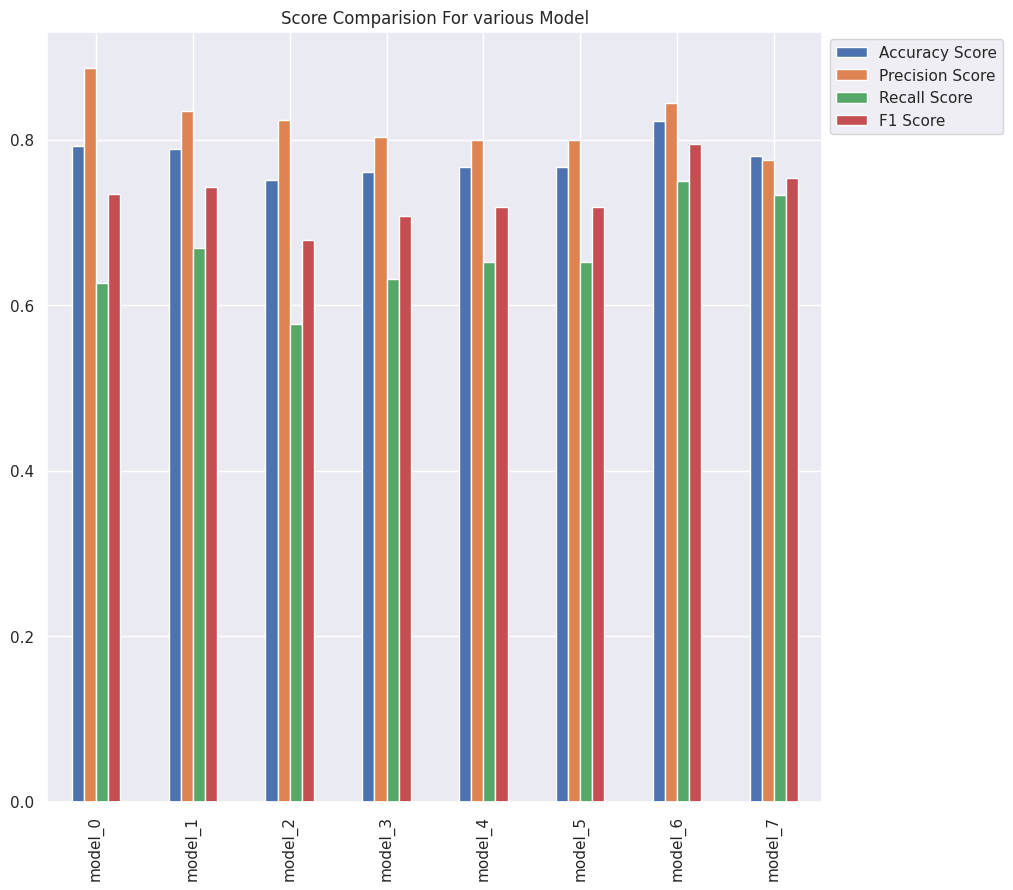

In [ ]:
results.plot(kind = "bar" , figsize = (10,10),title ='Score Comparision For various Model').legend(bbox_to_anchor=(1,1));

In [ ]:
def predict(tweet:str):

    res = model_6.predict([tweet],verbose=0)

    result = np.round(res)
    if result == 0.:
        print(f"{tweet} - Not a Disaster")
    else:
        print(f"{tweet} - It's a Disaster")


In [ ]:
predict("Nuclear Bomb named dog Killed its owner")

Nuclear Bomb named dog Killed its owner - It's a Disaster
